Bagging与随机森林之二
===

# 4.总结
决策树是一个很流行的机器学习算法。这个算法的性能在特征值的缩放和各种转换的情况下依然保持不变，即使在包含不相关特征的前提下，它依然很健壮。然而，决策树很容易过拟合训练集。它有低的偏差，但是有很高的方差，因此它的准确性不怎么好。bagging是早期的集成方法(ensemble method)，它可以重复地构建多个决策树基于有放回地重新采样，然后集成这些决策树模型进行投票，从而得到更好地准确性。

## 4.1.正确采样率
下面的程序模拟了采样次数以及正确采样率

/Users/JJZHK/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


9 次采样正确率： 0.6214209454492188
109 次采样正确率： 0.8529248106496278
209 次采样正确率： 0.9266174850684462
309 次采样正确率： 0.9611075441817517
409 次采样正确率： 0.9787555232982922
509 次采样正确率： 0.9881786394306903
609 次采样正确率： 0.9933384209653018
709 次采样正确率： 0.9962112837399784


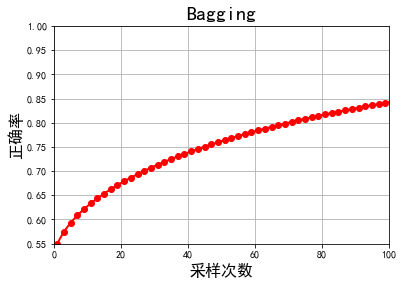

In [1]:
import operator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from functools import reduce
%matplotlib inline

def c(n, k):
    len1 = n - k + 1
    len2 = n + 1
    len3 = k + 1
    c1 = reduce(operator.mul, range(len1, len2))
    c2 = reduce(operator.mul, range(1, len3))
    return  c1 / c2;

def bagging(n, p):
    s = 0
    for i in range(int(n / 2 + 1), int(n + 1)):
        s += c(n, i) * p ** i * (1 - p) ** (n - i)
    return s

n = 800
x = np.arange(1, n, 2)
y = np.empty_like(x, dtype=np.float)
for i, t in enumerate(x):
    y[i] = bagging(t, 0.55)
    if t % 100 == 9:
        print(t, '次采样正确率：', y[i])
mpl.rcParams[u'font.sans-serif'] = u'SimHei'
mpl.rcParams[u'axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(x, y, 'ro-', lw=2)
plt.xlim(0,100)
plt.ylim(0.55, 1)
plt.xlabel(u'采样次数', fontsize=16)
plt.ylabel(u'正确率', fontsize=16)
plt.title(u'Bagging', fontsize=20)
plt.grid(b=True)